In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from tensorflow.keras.models import load_model
%matplotlib inline

In [2]:
df=pd.read_csv("DATA/cancer_classification.csv")

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

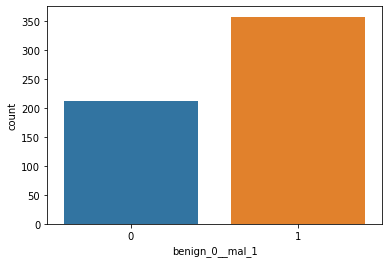

In [5]:
sns.countplot(x="benign_0__mal_1",data=df)

In [6]:
df.corr()['benign_0__mal_1'].sort_values(ascending=True)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [7]:
X=df.drop("benign_0__mal_1",axis=1).values
y=df['benign_0__mal_1'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25, 
                                                    random_state=101)

In [9]:
scaler=MinMaxScaler()

In [10]:
X_train=scaler.fit_transform(X_train)

In [11]:
X_test=scaler.transform(X_test)

In [12]:
len(df.columns)-1
#number of features

30

In [13]:
early_stop =EarlyStopping(monitor='val_loss', mode="min",
                        verbose=1,patience=25)

In [14]:
model= Sequential()

model.add(Dense(30, activation="relu"))

model.add(Dense(15, activation="relu"))

#Binary Classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',
              loss='binary_crossentropy')

In [15]:
model.fit(x=X_train,y=y_train,batch_size=128,
         validation_data=(X_test,y_test),epochs=600,
          callbacks=early_stop)

Epoch 1/600
4/4 [==============================] - 1s 207ms/step - loss: 0.6799 - val_loss: 0.6686
Epoch 2/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6687 - val_loss: 0.6590
Epoch 3/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6592 - val_loss: 0.6491
Epoch 4/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6464 - val_loss: 0.6390
Epoch 5/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6374 - val_loss: 0.6284
Epoch 6/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6287 - val_loss: 0.6163
Epoch 7/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6157 - val_loss: 0.6028
Epoch 8/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6015 - val_loss: 0.5875
Epoch 9/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5889 - val_loss: 0.5717
Epoch 10/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5732 - val_loss: 0.5552
Epoch 11/600
4/4 [

Epoch 84/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0779 - val_loss: 0.1308
Epoch 85/600
4/4 [==============================] - 0s 14ms/step - loss: 0.0791 - val_loss: 0.1329
Epoch 86/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0823 - val_loss: 0.1325
Epoch 87/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0857 - val_loss: 0.1297
Epoch 88/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0796 - val_loss: 0.1268
Epoch 89/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0755 - val_loss: 0.1304
Epoch 90/600
4/4 [==============================] - 0s 14ms/step - loss: 0.0765 - val_loss: 0.1351
Epoch 91/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0752 - val_loss: 0.1342
Epoch 92/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0811 - val_loss: 0.1280
Epoch 93/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0759 - val_loss: 0.1256
Epoch 94/6

In [16]:
loss_df=pd.DataFrame(data=model.history.history)

In [17]:
loss_df

,loss,val_loss
0,0.677677,0.668620
1,0.667073,0.659003
2,0.657469,0.649108
3,0.647747,0.639026
4,0.637325,0.628377
...,...,...
131,0.059246,0.128555
132,0.058553,0.128640
133,0.058622,0.126913
134,0.058168,0.129685


<AxesSubplot:>

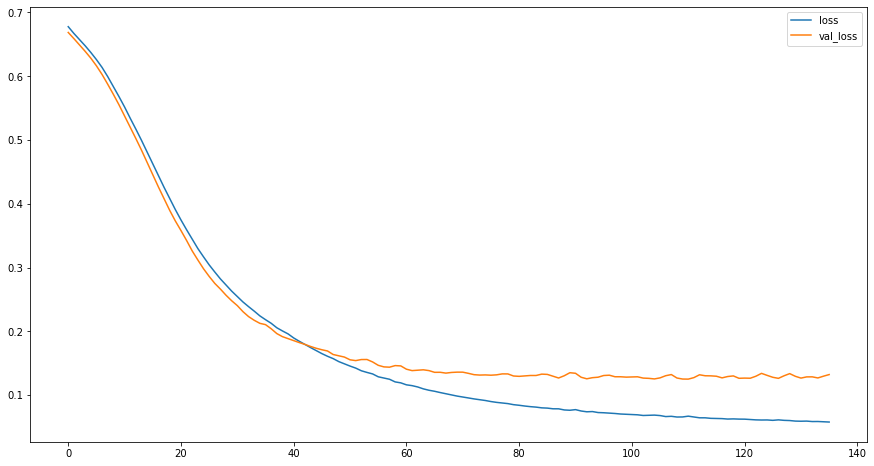

In [18]:
loss_df.plot(figsize=(15,8))

In [19]:
predictions=model.predict(X_test)


In [20]:
predictions.shape

(143, 1)

In [21]:
test_predictions=pd.Series(predictions.reshape(143,))
test_predictions

0      0.991954
1      0.982576
2      0.993890
3      0.007174
4      0.999357
         ...   
138    0.000292
139    0.999997
140    0.001093
141    0.918612
142    0.000150
Length: 143, dtype: float32

In [22]:
pred_df=pd.DataFrame(y_test,columns=["True Test Y"])
pred_df

,True Test Y
0,1
1,1
2,1
3,0
4,1
...,...
138,0
139,1
140,0
141,1


In [23]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [24]:
pred_df.columns=["True Test Y","Model Prediction"]

In [25]:
pred_df

,True Test Y,Model Prediction
0,1,0.991954
1,1,0.982576
2,1,0.993890
3,0,0.007174
4,1,0.999357
...,...,...
138,0,0.000292
139,1,0.999997
140,0,0.001093
141,1,0.918612


In [26]:
def round(x):
    number_dec = float(str(x-int(x))[1:])
    if number_dec>0.5:
        return 1
    elif number_dec==0.5:
        return number_dec
    else:
        return 0

In [27]:
pred_df["Model Prediction"]=pred_df["Model Prediction"].apply(round)

In [28]:
matching_data_num=len(pred_df[pred_df["True Test Y"]==pred_df["Model Prediction"]])

In [29]:
print('MAE:', mean_absolute_error(y_test, predictions))  
print('MSE:', mean_squared_error(y_test, predictions))  
print('RMSE:',np.sqrt(mean_squared_error(y_test, predictions)))
print('VarScore:',explained_variance_score(y_test,predictions))

MAE: 0.06291111964957226
MSE: 0.026597924042063313
RMSE: 0.1630886999214333
VarScore: 0.8902241427192943


In [30]:
predict_class=model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
print(classification_report(y_test,predict_class))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



## With Dropout

In [32]:
model= Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',
              loss='binary_crossentropy')

In [33]:
model.fit(x=X_train,y=y_train,batch_size=128,
         validation_data=(X_test,y_test),epochs=600,
          callbacks=early_stop)

Epoch 1/600
4/4 [==============================] - 1s 43ms/step - loss: 0.7120 - val_loss: 0.6679
Epoch 2/600
4/4 [==============================] - 0s 12ms/step - loss: 0.6937 - val_loss: 0.6628
Epoch 3/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6873 - val_loss: 0.6581
Epoch 4/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6751 - val_loss: 0.6535
Epoch 5/600
4/4 [==============================] - 0s 12ms/step - loss: 0.6747 - val_loss: 0.6488
Epoch 6/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6676 - val_loss: 0.6438
Epoch 7/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6769 - val_loss: 0.6384
Epoch 8/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6597 - val_loss: 0.6328
Epoch 9/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6535 - val_loss: 0.6268
Epoch 10/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6584 - val_loss: 0.6210
Epoch 11/600
4/4 [=

Epoch 84/600
4/4 [==============================] - 0s 12ms/step - loss: 0.2288 - val_loss: 0.1423
Epoch 85/600
4/4 [==============================] - 0s 13ms/step - loss: 0.2166 - val_loss: 0.1400
Epoch 86/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1944 - val_loss: 0.1342
Epoch 87/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1852 - val_loss: 0.1303
Epoch 88/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1994 - val_loss: 0.1313
Epoch 89/600
4/4 [==============================] - 0s 13ms/step - loss: 0.2075 - val_loss: 0.1315
Epoch 90/600
4/4 [==============================] - 0s 13ms/step - loss: 0.2080 - val_loss: 0.1297
Epoch 91/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1751 - val_loss: 0.1268
Epoch 92/600
4/4 [==============================] - 0s 13ms/step - loss: 0.2074 - val_loss: 0.1251
Epoch 93/600
4/4 [==============================] - 0s 15ms/step - loss: 0.2350 - val_loss: 0.1240
Epoch 94/6

4/4 [==============================] - 0s 12ms/step - loss: 0.1274 - val_loss: 0.0993
Epoch 167/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1239 - val_loss: 0.1005
Epoch 168/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1119 - val_loss: 0.1022
Epoch 169/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1013 - val_loss: 0.1037
Epoch 170/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1134 - val_loss: 0.1030
Epoch 171/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1172 - val_loss: 0.0979
Epoch 172/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1090 - val_loss: 0.0951
Epoch 173/600
4/4 [==============================] - 0s 14ms/step - loss: 0.1211 - val_loss: 0.0949
Epoch 174/600
4/4 [==============================] - 0s 13ms/step - loss: 0.0994 - val_loss: 0.0926
Epoch 175/600
4/4 [==============================] - 0s 14ms/step - loss: 0.1183 - val_loss: 0.0921
Epoch 176/600


4/4 [==============================] - 0s 13ms/step - loss: 0.0921 - val_loss: 0.0918
Epoch 249/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1008 - val_loss: 0.0919
Epoch 00249: early stopping


In [34]:
loss_df=pd.DataFrame(data=model.history.history)

<AxesSubplot:>

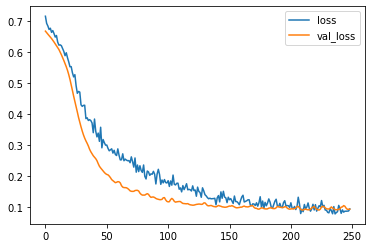

In [35]:
loss_df.plot()

<br><br><br>
This is a better behavior than previous one
<br><br><br>

In [36]:
predictions=model.predict(X_test)
test_predictions=pd.Series(predictions.reshape(143,))
pred_df=pd.DataFrame(y_test,columns=["True Test Y"])
pred_df=pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns=["True Test Y","Model Prediction"]
pred_df["Model Prediction"]=pred_df["Model Prediction"].apply(round)

In [37]:
pred_df

,True Test Y,Model Prediction
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
138,0,0
139,1,1
140,0,0
141,1,1


In [38]:
print('MAE:', mean_absolute_error(y_test, predictions))  
print('MSE:', mean_squared_error(y_test, predictions))  
print('RMSE:',np.sqrt(mean_squared_error(y_test, predictions)))
print('VarScore:',explained_variance_score(y_test,predictions))

MAE: 0.04288639296961526
MSE: 0.018324767562135948
RMSE: 0.13536900517524664
VarScore: 0.9227699480731295


In [39]:
predict_class=model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
print(classification_report(y_test,predict_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Rant

So, first I didn't use dropout and when I created the dataframe to compare true value and predictions, it showed me only 2/143 data were wrong. 

After I used dropout, the accuracy inceased slightly. However I still feel like it is not fully learned.